In [1]:
import numpy as np
import math


def Rotation(arr, eps=0.1):
    A = np.array(arr)
    n = len(A)
    iterator = 0
    self_vectors = np.eye(len(A))
    while iterator < 1000000:
        iterator += 1
        max_a = max([[math.fabs(A[i][j]), i, j] for i in range(n) for j in range(n) if i != j], key=lambda x: x[0])

        my_round = lambda x: round(x, 4)
        U = np.eye(n)
        a, i, j = max_a
        phi = 0.5 * math.atan((2 * a)/(A[i][i] - A[j][j])) if A[i][i] != A[j][j] else math.pi/4
        U[i][i] = math.cos(phi)
        U[j][j] = math.cos(phi)
        U[i][j] = -math.sin(phi)
        U[j][i] = math.sin(phi)

        self_vectors = np.dot(self_vectors, U)

        A = np.dot(np.dot(U.T, A), U)

        if math.sqrt(sum([A[i][j]**2 for i in range(n) for j in range(i + 1, n)])) < eps:
            break

    return A, iterator, self_vectors

In [2]:
A = [
    [8, 2, -1],
    [2, -5, -8],
    [-1, -8, -5]
]

it = []
for eps in [0.5, 0.3, 0.1, 0.05, 0.01, 0.005, 0.0005, 0.0001, 0.00005, 0.00001]:
    a, i, v = Rotation(A, eps)
    it.append(i)

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
epsarr = [0.5, 0.3, 0.1, 0.05, 0.01, 0.005, 0.0005, 0.0001, 0.00005, 0.00001]
epsarr.reverse()
it.reverse()
epsarr, it

([1e-05, 5e-05, 0.0001, 0.0005, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
 [1000000, 1000000, 228537, 56056, 3676, 3675, 213, 30, 29, 29])

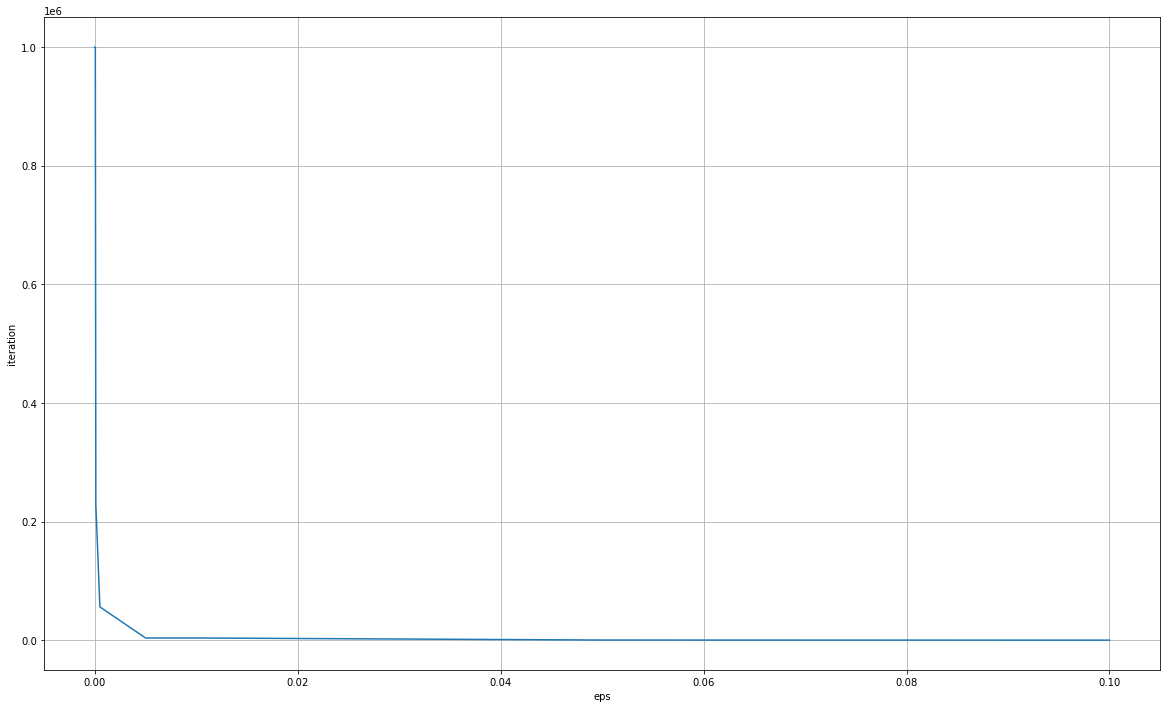

In [14]:
plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('eps')
plt.ylabel('iteration')

plt.plot(epsarr[:-2], it[:-2])